In [1]:
#what we need: batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm


In [2]:
filenames=[]
for file in os.listdir('E:\odis'):
    filenames.append(os.path.join('E:\odis',file))

In [3]:
filenames[0:5]

['E:\\odis\\1000887.yaml',
 'E:\\odis\\1000889.yaml',
 'E:\\odis\\1000891.yaml',
 'E:\\odis\\1000893.yaml',
 'E:\\odis\\1000895.yaml']

In [4]:
final_df=pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file,'r') as f:
        df=pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = final_df._append(df)
        counter+=1



100%|██████████████████████████████████████████████████████████████████████████████| 2033/2033 [18:14<00:00,  1.86it/s]


In [5]:
final_df

,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.outcome.by.runs,info.outcome.winner,...,info.supersubs.Asia XI,info.supersubs.Zimbabwe,info.supersubs.Sri Lanka,info.supersubs.Bangladesh,info.supersubs.New Zealand,info.supersubs.India,info.supersubs.ICC World XI,info.supersubs.South Africa,info.supersubs.Pakistan,info.supersubs.West Indies
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-01-14,2,Brisbane,[2017-01-13],male,ODI,92.0,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-01-18,1,NaN,[2017-01-15],male,ODI,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",0.9,2017-01-21,1,Perth,[2017-01-19],male,ODI,NaN,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-01-22,1,NaN,[2017-01-22],male,ODI,86.0,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-01-28,1,NaN,[2017-01-26],male,ODI,57.0,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",0.9,2016-07-13,1,Belfast,[2016-07-12],male,ODI,39.0,Afghanistan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",0.9,2016-07-20,1,Belfast,[2016-07-17],male,ODI,79.0,Afghanistan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",0.9,2016-07-20,1,Belfast,[2016-07-19],male,ODI,12.0,Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Scotland', 'deliver...",0.9,2016-08-20,1,Edinburgh,[2016-08-14],male,ODI,98.0,Scotland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
backup=final_df.copy()

In [7]:
final_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.supersubs.South Africa',
    'info.supersubs.Australia',
    'info.supersubs.England',
    'info.supersubs.Africa XI',
    'info.supersubs.Asia XI',
    'info.supersubs.Zimbabwe',
    'info.supersubs.Sri Lanka',
    'info.supersubs.Bangladesh',
    'info.supersubs.India',
    'info.supersubs.ICC World XI',
    'info.supersubs.Pakistan',
    'info.supersubs.West Indies',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets'
],inplace=True)

In [8]:
final_df

,innings,info.city,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'Australia', 'delive...",Brisbane,[2017-01-13],male,ODI,Australia,50,[MS Wade],"[Australia, Pakistan]",bat,Australia,"[MD Martell, C Shamshuddin]","Brisbane Cricket Ground, Woolloongabba",1
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-15],male,ODI,Pakistan,50,[Mohammad Hafeez],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, P Wilson]",Melbourne Cricket Ground,2
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2017-01-19],male,ODI,Australia,50,[SPD Smith],"[Australia, Pakistan]",field,Australia,"[SD Fry, C Shamshuddin]",Western Australia Cricket Association Ground,3
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-22],male,ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, MD Martell]",Sydney Cricket Ground,4
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-26],male,ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[SD Fry, C Shamshuddin]",Adelaide Oval,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Belfast,[2016-07-12],male,ODI,Afghanistan,50,NaN,"[Ireland, Afghanistan]",field,Ireland,"[AJ Neill, IN Ramage]","Civil Service Cricket Club, Stormont",2029
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Belfast,[2016-07-17],male,ODI,Afghanistan,50,NaN,"[Ireland, Afghanistan]",bat,Afghanistan,"[AJ Neill, C Shamshuddin]","Civil Service Cricket Club, Stormont",2030
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",Belfast,[2016-07-19],male,ODI,Ireland,50,NaN,"[Ireland, Afghanistan]",field,Afghanistan,"[R Black, C Shamshuddin]","Civil Service Cricket Club, Stormont",2031
0,"[{'1st innings': {'team': 'Scotland', 'deliver...",Edinburgh,[2016-08-14],male,ODI,Scotland,50,NaN,"[Scotland, United Arab Emirates]",field,United Arab Emirates,"[DA Haggo, M Hawthorne]","Grange Cricket Club Ground, Raeburn Place",2032


In [9]:
final_df['info.gender'].value_counts()

info.gender
male      1799
female     234
Name: count, dtype: int64

In [10]:
final_df = final_df[final_df['info.gender']=='male']
final_df.drop(columns=['info.gender'],inplace=True)
final_df

C:\Users\User\AppData\Local\Temp\ipykernel_25648\1101213280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.gender'],inplace=True)


,innings,info.city,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'Australia', 'delive...",Brisbane,[2017-01-13],ODI,Australia,50,[MS Wade],"[Australia, Pakistan]",bat,Australia,"[MD Martell, C Shamshuddin]","Brisbane Cricket Ground, Woolloongabba",1
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-15],ODI,Pakistan,50,[Mohammad Hafeez],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, P Wilson]",Melbourne Cricket Ground,2
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2017-01-19],ODI,Australia,50,[SPD Smith],"[Australia, Pakistan]",field,Australia,"[SD Fry, C Shamshuddin]",Western Australia Cricket Association Ground,3
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-22],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, MD Martell]",Sydney Cricket Ground,4
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-26],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[SD Fry, C Shamshuddin]",Adelaide Oval,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Belfast,[2016-07-12],ODI,Afghanistan,50,NaN,"[Ireland, Afghanistan]",field,Ireland,"[AJ Neill, IN Ramage]","Civil Service Cricket Club, Stormont",2029
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Belfast,[2016-07-17],ODI,Afghanistan,50,NaN,"[Ireland, Afghanistan]",bat,Afghanistan,"[AJ Neill, C Shamshuddin]","Civil Service Cricket Club, Stormont",2030
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",Belfast,[2016-07-19],ODI,Ireland,50,NaN,"[Ireland, Afghanistan]",field,Afghanistan,"[R Black, C Shamshuddin]","Civil Service Cricket Club, Stormont",2031
0,"[{'1st innings': {'team': 'Scotland', 'deliver...",Edinburgh,[2016-08-14],ODI,Scotland,50,NaN,"[Scotland, United Arab Emirates]",field,United Arab Emirates,"[DA Haggo, M Hawthorne]","Grange Cricket Club Ground, Raeburn Place",2032


In [11]:
final_df['info.match_type'].value_counts()

info.match_type
ODI    1799
Name: count, dtype: int64

In [12]:
final_df['info.overs'].value_counts()

info.overs
50    1799
Name: count, dtype: int64

In [13]:
# Assuming df is your DataFrame
final_df[['team1', 'team2']] = pd.DataFrame(final_df['info.teams'].tolist(), index=final_df.index)

final_df

C:\Users\User\AppData\Local\Temp\ipykernel_25648\323718028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[['team1', 'team2']] = pd.DataFrame(final_df['info.teams'].tolist(), index=final_df.index)
C:\Users\User\AppData\Local\Temp\ipykernel_25648\323718028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[['team1', 'team2']] = pd.DataFrame(final_df['info.teams'].tolist(), index=final_df.index)


,innings,info.city,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,team1,team2
0,"[{'1st innings': {'team': 'Australia', 'delive...",Brisbane,[2017-01-13],ODI,Australia,50,[MS Wade],"[Australia, Pakistan]",bat,Australia,"[MD Martell, C Shamshuddin]","Brisbane Cricket Ground, Woolloongabba",1,Australia,Pakistan
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-15],ODI,Pakistan,50,[Mohammad Hafeez],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, P Wilson]",Melbourne Cricket Ground,2,Australia,Pakistan
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2017-01-19],ODI,Australia,50,[SPD Smith],"[Australia, Pakistan]",field,Australia,"[SD Fry, C Shamshuddin]",Western Australia Cricket Association Ground,3,Australia,Pakistan
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-22],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, MD Martell]",Sydney Cricket Ground,4,Australia,Pakistan
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-26],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[SD Fry, C Shamshuddin]",Adelaide Oval,5,Australia,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Belfast,[2016-07-12],ODI,Afghanistan,50,NaN,"[Ireland, Afghanistan]",field,Ireland,"[AJ Neill, IN Ramage]","Civil Service Cricket Club, Stormont",2029,Ireland,Afghanistan
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",Belfast,[2016-07-17],ODI,Afghanistan,50,NaN,"[Ireland, Afghanistan]",bat,Afghanistan,"[AJ Neill, C Shamshuddin]","Civil Service Cricket Club, Stormont",2030,Ireland,Afghanistan
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",Belfast,[2016-07-19],ODI,Ireland,50,NaN,"[Ireland, Afghanistan]",field,Afghanistan,"[R Black, C Shamshuddin]","Civil Service Cricket Club, Stormont",2031,Ireland,Afghanistan
0,"[{'1st innings': {'team': 'Scotland', 'deliver...",Edinburgh,[2016-08-14],ODI,Scotland,50,NaN,"[Scotland, United Arab Emirates]",field,United Arab Emirates,"[DA Haggo, M Hawthorne]","Grange Cricket Club Ground, Raeburn Place",2032,Scotland,United Arab Emirates


In [14]:
final_df['team1'].unique()

array(['Australia', 'Scotland', 'Zimbabwe', 'New Zealand', 'England',
       'South Africa', 'India', 'Pakistan', 'Bangladesh', 'Hong Kong',
       'West Indies', 'Ireland', 'Afghanistan', 'Sri Lanka',
       'United Arab Emirates', 'Papua New Guinea', 'Namibia',
       'Netherlands', 'Oman', 'United States of America', 'Nepal',
       'Africa XI', 'Bermuda', 'Canada', 'Kenya'], dtype=object)

In [15]:
teams= [
    'India',
    'Pakistan',
    'Australia',
    'South Africa',
    'New Zealand',
    'England',
    'Bangladesh',
    'Sri Lanka',
    'Afghanistan',
    'Netherlands'
]

In [16]:
final_df = final_df[final_df['team1'].isin(teams)] 
final_df = final_df[final_df['team2'].isin(teams)]


In [17]:
final_df

,innings,info.city,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,team1,team2
0,"[{'1st innings': {'team': 'Australia', 'delive...",Brisbane,[2017-01-13],ODI,Australia,50,[MS Wade],"[Australia, Pakistan]",bat,Australia,"[MD Martell, C Shamshuddin]","Brisbane Cricket Ground, Woolloongabba",1,Australia,Pakistan
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-15],ODI,Pakistan,50,[Mohammad Hafeez],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, P Wilson]",Melbourne Cricket Ground,2,Australia,Pakistan
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2017-01-19],ODI,Australia,50,[SPD Smith],"[Australia, Pakistan]",field,Australia,"[SD Fry, C Shamshuddin]",Western Australia Cricket Association Ground,3,Australia,Pakistan
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-22],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, MD Martell]",Sydney Cricket Ground,4,Australia,Pakistan
0,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-26],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[SD Fry, C Shamshuddin]",Adelaide Oval,5,Australia,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Colombo,[2016-08-21],ODI,Australia,50,[JP Faulkner],"[Sri Lanka, Australia]",field,Australia,"[Aleem Dar, REJ Martinesz]",R Premadasa Stadium,2024,Sri Lanka,Australia
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Colombo,[2016-08-24],ODI,Sri Lanka,50,[AD Mathews],"[Sri Lanka, Australia]",bat,Sri Lanka,"[MA Gough, RR Wimalasiri]",R Premadasa Stadium,2025,Sri Lanka,Australia
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",NaN,[2016-08-28],ODI,Australia,50,[GJ Bailey],"[Sri Lanka, Australia]",bat,Sri Lanka,"[Aleem Dar, REJ Martinesz]",Rangiri Dambulla International Stadium,2026,Sri Lanka,Australia
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",NaN,[2016-08-31],ODI,Australia,50,[JW Hastings],"[Sri Lanka, Australia]",bat,Sri Lanka,"[MA Gough, RSA Palliyaguruge]",Rangiri Dambulla International Stadium,2027,Sri Lanka,Australia


In [18]:
#we need to find total runs in 1st innings
final_df.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.4: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.5: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'extras': {'wides': 1},
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 1, 'total': 1}}},
 {0.6: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.7: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {

In [19]:
count = 1
delivery_df = pd.DataFrame()

for index, row in final_df.iterrows():
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    #match_id = []  # Remove this line

    city = []
    venue = []

    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            # Remove the following line to keep the original match_id
            # match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')

    loop_df = pd.DataFrame({
        'match_id': row['match_id'],  # Use the original match_id from the matches DataFrame
        'teams': teams,
        'batting_team': batting_team,
        'ball': ball_of_match,
        'batsman': batsman,
        'bowler': bowler,
        'runs': runs,
        'player_dismissed': player_of_dismissed,
        'city': city,
        'venue': venue
    })

    delivery_df = delivery_df._append(loop_df, ignore_index=True)
    count += 1


In [20]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,1,"[Australia, Pakistan]",Australia,0.1,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,"[Australia, Pakistan]",Australia,0.2,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,"[Australia, Pakistan]",Australia,0.3,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,"[Australia, Pakistan]",Australia,0.4,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,"[Australia, Pakistan]",Australia,0.5,DA Warner,Mohammad Amir,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
312979,2028,"[Sri Lanka, Australia]",Sri Lanka,39.5,SS Pathirana,MA Starc,0,0,NaN,Pallekele International Cricket Stadium
312980,2028,"[Sri Lanka, Australia]",Sri Lanka,39.6,SS Pathirana,MA Starc,0,0,NaN,Pallekele International Cricket Stadium
312981,2028,"[Sri Lanka, Australia]",Sri Lanka,39.7,SS Pathirana,MA Starc,1,0,NaN,Pallekele International Cricket Stadium
312982,2028,"[Sri Lanka, Australia]",Sri Lanka,40.1,SS Pathirana,SM Boland,0,0,NaN,Pallekele International Cricket Stadium


In [21]:
#to get bowling team
def bowl(row):
    for team in row['teams']:
        if(team) !=row['batting_team']:
            return team

In [22]:
delivery_df['bowling_team']=delivery_df.apply(bowl,axis=1)

In [23]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,"[Australia, Pakistan]",Australia,0.1,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
1,1,"[Australia, Pakistan]",Australia,0.2,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
2,1,"[Australia, Pakistan]",Australia,0.3,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
3,1,"[Australia, Pakistan]",Australia,0.4,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
4,1,"[Australia, Pakistan]",Australia,0.5,DA Warner,Mohammad Amir,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
...,...,...,...,...,...,...,...,...,...,...,...
312979,2028,"[Sri Lanka, Australia]",Sri Lanka,39.5,SS Pathirana,MA Starc,0,0,NaN,Pallekele International Cricket Stadium,Australia
312980,2028,"[Sri Lanka, Australia]",Sri Lanka,39.6,SS Pathirana,MA Starc,0,0,NaN,Pallekele International Cricket Stadium,Australia
312981,2028,"[Sri Lanka, Australia]",Sri Lanka,39.7,SS Pathirana,MA Starc,1,0,NaN,Pallekele International Cricket Stadium,Australia
312982,2028,"[Sri Lanka, Australia]",Sri Lanka,40.1,SS Pathirana,SM Boland,0,0,NaN,Pallekele International Cricket Stadium,Australia


In [24]:
delivery_df.drop(columns=['teams'],inplace=True)
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,Australia,0.1,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
1,1,Australia,0.2,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
2,1,Australia,0.3,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
3,1,Australia,0.4,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
4,1,Australia,0.5,DA Warner,Mohammad Amir,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
...,...,...,...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,39.5,SS Pathirana,MA Starc,0,0,NaN,Pallekele International Cricket Stadium,Australia
312980,2028,Sri Lanka,39.6,SS Pathirana,MA Starc,0,0,NaN,Pallekele International Cricket Stadium,Australia
312981,2028,Sri Lanka,39.7,SS Pathirana,MA Starc,1,0,NaN,Pallekele International Cricket Stadium,Australia
312982,2028,Sri Lanka,40.1,SS Pathirana,SM Boland,0,0,NaN,Pallekele International Cricket Stadium,Australia


In [25]:
delivery_df['batting_team'].unique()

array(['Australia', 'Pakistan', 'New Zealand', 'Bangladesh',
       'South Africa', 'India', 'England', 'Sri Lanka', 'Afghanistan',
       'Netherlands'], dtype=object)

In [26]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Australia,Pakistan,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,Pakistan,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,Pakistan,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,Pakistan,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,Pakistan,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,Australia,39.5,0,0,NaN,Pallekele International Cricket Stadium
312980,2028,Sri Lanka,Australia,39.6,0,0,NaN,Pallekele International Cricket Stadium
312981,2028,Sri Lanka,Australia,39.7,1,0,NaN,Pallekele International Cricket Stadium
312982,2028,Sri Lanka,Australia,40.1,0,0,NaN,Pallekele International Cricket Stadium


In [27]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Australia,Pakistan,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,Pakistan,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,Pakistan,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,Pakistan,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,Pakistan,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,Australia,39.5,0,0,NaN,Pallekele International Cricket Stadium
312980,2028,Sri Lanka,Australia,39.6,0,0,NaN,Pallekele International Cricket Stadium
312981,2028,Sri Lanka,Australia,39.7,1,0,NaN,Pallekele International Cricket Stadium
312982,2028,Sri Lanka,Australia,40.1,0,0,NaN,Pallekele International Cricket Stadium


In [28]:
output.isnull().sum()

match_id                0
batting_team            0
bowling_team            0
ball                    0
runs                    0
player_dismissed        0
city                56082
venue                   0
dtype: int64

In [29]:
output[output['city'].isnull()]['venue'].value_counts()

venue
Sydney Cricket Ground                      9595
Rangiri Dambulla International Stadium     9450
Melbourne Cricket Ground                   7778
Adelaide Oval                              7166
Dubai International Cricket Stadium        6314
Pallekele International Cricket Stadium    5945
Sharjah Cricket Stadium                    4291
Harare Sports Club                         1538
Chittagong Divisional Stadium               900
Multan Cricket Stadium                      883
Rawalpindi Cricket Stadium                  617
Perth Stadium                               526
Dubai Sports City Cricket Stadium           518
Sharjah Cricket Association Stadium         303
Queenstown Events Centre                    258
Name: count, dtype: int64

In [30]:
cities = np.where(output['city'].isnull(),output['venue'].str.split().apply(lambda x:x[0]),output['city'])

In [31]:
output['city'] = cities

C:\Users\User\AppData\Local\Temp\ipykernel_25648\1481407363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['city'] = cities


In [32]:
output.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [33]:
output.drop(columns=['venue'],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_25648\2962604362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.drop(columns=['venue'],inplace=True)


In [34]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,1,Australia,Pakistan,0.1,0,0,Brisbane
1,1,Australia,Pakistan,0.2,0,0,Brisbane
2,1,Australia,Pakistan,0.3,0,0,Brisbane
3,1,Australia,Pakistan,0.4,0,0,Brisbane
4,1,Australia,Pakistan,0.5,1,0,Brisbane
...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,Australia,39.5,0,0,Pallekele
312980,2028,Sri Lanka,Australia,39.6,0,0,Pallekele
312981,2028,Sri Lanka,Australia,39.7,1,0,Pallekele
312982,2028,Sri Lanka,Australia,40.1,0,0,Pallekele


In [35]:
output['current_score'] = output.groupby('match_id')['runs'].cumsum()
output

C:\Users\User\AppData\Local\Temp\ipykernel_25648\3648381862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['current_score'] = output.groupby('match_id')['runs'].cumsum()


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,1,Australia,Pakistan,0.1,0,0,Brisbane,0
1,1,Australia,Pakistan,0.2,0,0,Brisbane,0
2,1,Australia,Pakistan,0.3,0,0,Brisbane,0
3,1,Australia,Pakistan,0.4,0,0,Brisbane,0
4,1,Australia,Pakistan,0.5,1,0,Brisbane,1
...,...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,Australia,39.5,0,0,Pallekele,194
312980,2028,Sri Lanka,Australia,39.6,0,0,Pallekele,194
312981,2028,Sri Lanka,Australia,39.7,1,0,Pallekele,195
312982,2028,Sri Lanka,Australia,40.1,0,0,Pallekele,195


In [36]:
output['over'] = output['ball'].apply(lambda x:str(x).split(".")[0])
output['ball_no'] = output['ball'].apply(lambda x:str(x).split(".")[1])
output

C:\Users\User\AppData\Local\Temp\ipykernel_25648\2944276496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['over'] = output['ball'].apply(lambda x:str(x).split(".")[0])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,1,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1
1,1,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2
2,1,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3
3,1,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4
4,1,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5
...,...,...,...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,Australia,39.5,0,0,Pallekele,194,39,5
312980,2028,Sri Lanka,Australia,39.6,0,0,Pallekele,194,39,6
312981,2028,Sri Lanka,Australia,39.7,1,0,Pallekele,195,39,7
312982,2028,Sri Lanka,Australia,40.1,0,0,Pallekele,195,40,1


In [37]:
output['balls_bowled'] = (output['over'].astype('int')*6) + output['ball_no'].astype('int')
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,1,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1
1,1,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2
2,1,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3
3,1,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4
4,1,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
312979,2028,Sri Lanka,Australia,39.5,0,0,Pallekele,194,39,5,239
312980,2028,Sri Lanka,Australia,39.6,0,0,Pallekele,194,39,6,240
312981,2028,Sri Lanka,Australia,39.7,1,0,Pallekele,195,39,7,241
312982,2028,Sri Lanka,Australia,40.1,0,0,Pallekele,195,40,1,241


In [38]:
total_score_df=output.groupby('match_id').sum()['runs'].reset_index()

In [39]:
total_score_df

,match_id,runs
0,1,268
1,2,220
2,3,263
3,4,353
4,5,369
...,...,...
1073,2024,227
1074,2025,288
1075,2026,226
1076,2027,212


In [40]:
match_df =final_df.merge(total_score_df,on='match_id')

In [41]:
match_df

,innings,info.city,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,team1,team2,runs
0,"[{'1st innings': {'team': 'Australia', 'delive...",Brisbane,[2017-01-13],ODI,Australia,50,[MS Wade],"[Australia, Pakistan]",bat,Australia,"[MD Martell, C Shamshuddin]","Brisbane Cricket Ground, Woolloongabba",1,Australia,Pakistan,268
1,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-15],ODI,Pakistan,50,[Mohammad Hafeez],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, P Wilson]",Melbourne Cricket Ground,2,Australia,Pakistan,220
2,"[{'1st innings': {'team': 'Pakistan', 'deliver...",Perth,[2017-01-19],ODI,Australia,50,[SPD Smith],"[Australia, Pakistan]",field,Australia,"[SD Fry, C Shamshuddin]",Western Australia Cricket Association Ground,3,Australia,Pakistan,263
3,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-22],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[CB Gaffaney, MD Martell]",Sydney Cricket Ground,4,Australia,Pakistan,353
4,"[{'1st innings': {'team': 'Australia', 'delive...",NaN,[2017-01-26],ODI,Australia,50,[DA Warner],"[Australia, Pakistan]",bat,Australia,"[SD Fry, C Shamshuddin]",Adelaide Oval,5,Australia,Pakistan,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Colombo,[2016-08-21],ODI,Australia,50,[JP Faulkner],"[Sri Lanka, Australia]",field,Australia,"[Aleem Dar, REJ Martinesz]",R Premadasa Stadium,2024,Sri Lanka,Australia,227
1074,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",Colombo,[2016-08-24],ODI,Sri Lanka,50,[AD Mathews],"[Sri Lanka, Australia]",bat,Sri Lanka,"[MA Gough, RR Wimalasiri]",R Premadasa Stadium,2025,Sri Lanka,Australia,288
1075,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",NaN,[2016-08-28],ODI,Australia,50,[GJ Bailey],"[Sri Lanka, Australia]",bat,Sri Lanka,"[Aleem Dar, REJ Martinesz]",Rangiri Dambulla International Stadium,2026,Sri Lanka,Australia,226
1076,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",NaN,[2016-08-31],ODI,Australia,50,[JW Hastings],"[Sri Lanka, Australia]",bat,Sri Lanka,"[MA Gough, RSA Palliyaguruge]",Rangiri Dambulla International Stadium,2027,Sri Lanka,Australia,212


In [42]:
#match_df[['match_id','info.city','info.outcome.winner','runs']]

In [43]:
final_df.iloc[0]['innings'][1]['2nd innings']['deliveries']

[{0.1: {'batsman': 'Azhar Ali',
   'bowler': 'MA Starc',
   'non_striker': 'Sharjeel Khan',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'Azhar Ali',
   'bowler': 'MA Starc',
   'non_striker': 'Sharjeel Khan',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'Azhar Ali',
   'bowler': 'MA Starc',
   'non_striker': 'Sharjeel Khan',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.4: {'batsman': 'Azhar Ali',
   'bowler': 'MA Starc',
   'non_striker': 'Sharjeel Khan',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.5: {'batsman': 'Sharjeel Khan',
   'bowler': 'MA Starc',
   'non_striker': 'Azhar Ali',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'Sharjeel Khan',
   'bowler': 'MA Starc',
   'non_striker': 'Azhar Ali',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {1.1: {'batsman': 'Azhar Ali',
   'bowler': 'B Stanlake',
   'non_striker': 'Sharjeel Khan',
   'runs': {'batsman': 0, 'ext

In [44]:
count = 1
delivery_df1 = pd.DataFrame()

for index, row in final_df.iterrows():
    '''
    if count in [75, 100, 150, 180, 268, 360, 443, 458, 584, 748, 982, 1052, 1111, 1226, 1345]:
        count += 1
        continue
    '''
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    #game_id = []
    city = []
    venue = []

    # Choose the index of the innings you want (0 for 1st innings, 1 for 2nd innings)
    innings_index = 1

    # Check if the match has information for the 2nd innings
    if len(row['innings']) > innings_index and '2nd innings' in row['innings'][innings_index]:
        for ball in row['innings'][innings_index]['2nd innings']['deliveries']:
            for key in ball.keys():
                #match_id.append(count)
                batting_team.append(row['innings'][innings_index]['2nd innings']['team'])
                teams.append(row['info.teams'])
                ball_of_match.append(key)
                batsman.append(ball[key]['batsman'])
                bowler.append(ball[key]['bowler'])
                runs.append(ball[key]['runs']['total'])
                city.append(row['info.city'])
                venue.append(row['info.venue'])

                try:
                    player_of_dismissed.append(ball[key]['wicket']['player_out'])
                except KeyError:
                    player_of_dismissed.append('0')

        loop_df = pd.DataFrame({
            'match_id': row['match_id'],
            'teams': teams,
            'batting_team': batting_team,
            'ball': ball_of_match,
            'batsman': batsman,
            'bowler': bowler,
            'runs': runs,
            'player_dismissed': player_of_dismissed,
            'city': city,
            'venue': venue
        })

        delivery_df1 = delivery_df1._append(loop_df)
        count+=1


In [45]:
delivery_df1

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,1,"[Australia, Pakistan]",Pakistan,0.1,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,"[Australia, Pakistan]",Pakistan,0.2,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,"[Australia, Pakistan]",Pakistan,0.3,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,"[Australia, Pakistan]",Pakistan,0.4,Azhar Ali,MA Starc,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,"[Australia, Pakistan]",Pakistan,0.5,Sharjeel Khan,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
258,2028,"[Sri Lanka, Australia]",Australia,42.2,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium
259,2028,"[Sri Lanka, Australia]",Australia,42.3,JW Hastings,DM de Silva,4,0,NaN,Pallekele International Cricket Stadium
260,2028,"[Sri Lanka, Australia]",Australia,42.4,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium
261,2028,"[Sri Lanka, Australia]",Australia,42.5,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium


In [46]:
#to get bowling team
def bowl(row):
    for team in row['teams']:
        if(team) !=row['batting_team']:
            return team

In [47]:
delivery_df1['bowling_team']=delivery_df1.apply(bowl,axis=1)

In [48]:
delivery_df1

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,"[Australia, Pakistan]",Pakistan,0.1,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
1,1,"[Australia, Pakistan]",Pakistan,0.2,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
2,1,"[Australia, Pakistan]",Pakistan,0.3,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
3,1,"[Australia, Pakistan]",Pakistan,0.4,Azhar Ali,MA Starc,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
4,1,"[Australia, Pakistan]",Pakistan,0.5,Sharjeel Khan,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
...,...,...,...,...,...,...,...,...,...,...,...
258,2028,"[Sri Lanka, Australia]",Australia,42.2,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium,Sri Lanka
259,2028,"[Sri Lanka, Australia]",Australia,42.3,JW Hastings,DM de Silva,4,0,NaN,Pallekele International Cricket Stadium,Sri Lanka
260,2028,"[Sri Lanka, Australia]",Australia,42.4,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium,Sri Lanka
261,2028,"[Sri Lanka, Australia]",Australia,42.5,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium,Sri Lanka


In [49]:
delivery_df1.drop(columns=['teams'],inplace=True)
delivery_df1

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,Pakistan,0.1,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
1,1,Pakistan,0.2,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
2,1,Pakistan,0.3,Azhar Ali,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
3,1,Pakistan,0.4,Azhar Ali,MA Starc,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
4,1,Pakistan,0.5,Sharjeel Khan,MA Starc,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
...,...,...,...,...,...,...,...,...,...,...
258,2028,Australia,42.2,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium,Sri Lanka
259,2028,Australia,42.3,JW Hastings,DM de Silva,4,0,NaN,Pallekele International Cricket Stadium,Sri Lanka
260,2028,Australia,42.4,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium,Sri Lanka
261,2028,Australia,42.5,JW Hastings,DM de Silva,0,0,NaN,Pallekele International Cricket Stadium,Sri Lanka


In [50]:
delivery_df1['batting_team'].unique()

array(['Pakistan', 'Australia', 'New Zealand', 'Bangladesh',
       'South Africa', 'England', 'Sri Lanka', 'India', 'Afghanistan',
       'Netherlands'], dtype=object)

In [51]:
output1 = delivery_df1[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [52]:
output1

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Pakistan,Australia,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Pakistan,Australia,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Pakistan,Australia,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Pakistan,Australia,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Pakistan,Australia,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...
258,2028,Australia,Sri Lanka,42.2,0,0,NaN,Pallekele International Cricket Stadium
259,2028,Australia,Sri Lanka,42.3,4,0,NaN,Pallekele International Cricket Stadium
260,2028,Australia,Sri Lanka,42.4,0,0,NaN,Pallekele International Cricket Stadium
261,2028,Australia,Sri Lanka,42.5,0,0,NaN,Pallekele International Cricket Stadium


In [53]:
output1.isnull().sum()

match_id                0
batting_team            0
bowling_team            0
ball                    0
runs                    0
player_dismissed        0
city                47667
venue                   0
dtype: int64

In [54]:
output1[output1['city'].isnull()]['venue'].value_counts()

venue
Sydney Cricket Ground                      7950
Rangiri Dambulla International Stadium     7243
Melbourne Cricket Ground                   7138
Adelaide Oval                              6595
Dubai International Cricket Stadium        5341
Pallekele International Cricket Stadium    4888
Sharjah Cricket Stadium                    3696
Harare Sports Club                         1395
Chittagong Divisional Stadium               803
Multan Cricket Stadium                      708
Rawalpindi Cricket Stadium                  578
Dubai Sports City Cricket Stadium           546
Perth Stadium                               473
Sharjah Cricket Association Stadium         274
Queenstown Events Centre                     39
Name: count, dtype: int64

In [55]:
cities1 = np.where(output1['city'].isnull(),output1['venue'].str.split().apply(lambda x:x[0]),output1['city'])

In [56]:
output1['city'] = cities1

C:\Users\User\AppData\Local\Temp\ipykernel_25648\1629493512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output1['city'] = cities1


In [57]:
output1.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [58]:
output1

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Pakistan,Australia,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Pakistan,Australia,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Pakistan,Australia,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Pakistan,Australia,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Pakistan,Australia,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...
258,2028,Australia,Sri Lanka,42.2,0,0,Pallekele,Pallekele International Cricket Stadium
259,2028,Australia,Sri Lanka,42.3,4,0,Pallekele,Pallekele International Cricket Stadium
260,2028,Australia,Sri Lanka,42.4,0,0,Pallekele,Pallekele International Cricket Stadium
261,2028,Australia,Sri Lanka,42.5,0,0,Pallekele,Pallekele International Cricket Stadium


In [59]:
match_df2 =match_df[['match_id','info.outcome.winner','runs']]

In [60]:
match_df2.rename(columns={'runs': 'first_innings_total'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_25648\4155365498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df2.rename(columns={'runs': 'first_innings_total'}, inplace=True)


In [61]:
match_df2

,match_id,info.outcome.winner,first_innings_total
0,1,Australia,268
1,2,Pakistan,220
2,3,Australia,263
3,4,Australia,353
4,5,Australia,369
...,...,...,...
1073,2024,Australia,227
1074,2025,Sri Lanka,288
1075,2026,Australia,226
1076,2027,Australia,212


In [62]:
match_df2['info.outcome.winner'].unique()

array(['Australia', 'Pakistan', 'New Zealand', 'South Africa', 'England',
       nan, 'India', 'Sri Lanka', 'Bangladesh', 'Afghanistan',
       'Netherlands'], dtype=object)

In [63]:
# Merge based on match_id
output_df=match_df2.merge(output1,on='match_id')


In [64]:
output_df

,match_id,info.outcome.winner,first_innings_total,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,Pallekele International Cricket Stadium
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,Pallekele International Cricket Stadium
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,Pallekele International Cricket Stadium
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,Pallekele International Cricket Stadium


In [65]:
output_df.rename(columns={'info.outcome.winner': 'winner'}, inplace=True)

In [66]:
output_df.rename(columns={'runs': 'runs_on_that_ball'}, inplace=True)

In [67]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,venue
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,Pallekele International Cricket Stadium
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,Pallekele International Cricket Stadium
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,Pallekele International Cricket Stadium
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,Pallekele International Cricket Stadium


In [68]:
output_df = output_df.drop('venue', axis=1)


In [69]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane
...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele


In [70]:
output_df['current_score']=output_df.groupby('match_id')['runs_on_that_ball'].cumsum()
#df['current_score'] = df.groupby('match_id')['runs'].cumsum()

In [71]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1
...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195


In [72]:
#runs_left
output_df['runs_left'] = output_df['first_innings_total'] - output_df['current_score']

In [73]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267
...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0


In [74]:
output_df['over'] = output_df['ball'].apply(lambda x:str(x).split(".")[0])
output_df['ball_no'] = output_df['ball'].apply(lambda x:str(x).split(".")[1])
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4,42,2
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0,42,3
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0,42,4
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0,42,5


In [75]:
output_df['over'] = pd.to_numeric(output_df['over'], errors='coerce')
output_df['ball_no'] = pd.to_numeric(output_df['ball_no'], errors='coerce')

output_df['balls_left'] = 300 - (output_df['over']*6 + output_df['ball_no'])


In [76]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no,balls_left
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1,299
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2,298
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3,297
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4,296
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4,42,2,46
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0,42,3,45
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0,42,4,44
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0,42,5,43


In [77]:
#wickets_left
output_df['player_dismissed'] = output_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
output_df['player_dismissed'] = output_df['player_dismissed'].astype('int')
wickets = output_df.groupby('match_id')['player_dismissed'].cumsum().values
output_df['wickets_left']=10-wickets
output_df.head()

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no,balls_left,wickets_left
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1,299,10
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2,298,10
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3,297,10
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4,296,10
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5,295,10


In [78]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no,balls_left,wickets_left
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1,299,10
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2,298,10
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3,297,10
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4,296,10
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5,295,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4,42,2,46,5
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0,42,3,45,5
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0,42,4,44,5
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0,42,5,43,5


In [79]:
#crr=runs/overs
output_df['crr']=(output_df['current_score']*6/(300-output_df['balls_left']))


In [80]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no,balls_left,wickets_left,crr
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1,299,10,0.000000
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2,298,10,0.000000
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3,297,10,0.000000
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4,296,10,1.500000
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5,295,10,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4,42,2,46,5,4.511811
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0,42,3,45,5,4.588235
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0,42,4,44,5,4.570312
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0,42,5,43,5,4.552529


In [81]:
output_df['rrr']=(output_df['runs_left']*6)/output_df['balls_left']

In [82]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no,balls_left,wickets_left,crr,rrr
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1,299,10,0.000000,5.377926
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2,298,10,0.000000,5.395973
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3,297,10,0.000000,5.414141
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4,296,10,1.500000,5.412162
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5,295,10,1.200000,5.430508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4,42,2,46,5,4.511811,0.521739
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0,42,3,45,5,4.588235,0.000000
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0,42,4,44,5,4.570312,0.000000
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0,42,5,43,5,4.552529,0.000000


In [83]:
#batting team==winner ->1 else if bowling_team==winer -> 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [84]:
output_df['result'] = output_df.apply(result,axis=1)

In [85]:
output_df

,match_id,winner,first_innings_total,batting_team,bowling_team,ball,runs_on_that_ball,player_dismissed,city,current_score,runs_left,over,ball_no,balls_left,wickets_left,crr,rrr,result
0,1,Australia,268,Pakistan,Australia,0.1,0,0,Brisbane,0,268,0,1,299,10,0.000000,5.377926,0
1,1,Australia,268,Pakistan,Australia,0.2,0,0,Brisbane,0,268,0,2,298,10,0.000000,5.395973,0
2,1,Australia,268,Pakistan,Australia,0.3,0,0,Brisbane,0,268,0,3,297,10,0.000000,5.414141,0
3,1,Australia,268,Pakistan,Australia,0.4,1,0,Brisbane,1,267,0,4,296,10,1.500000,5.412162,0
4,1,Australia,268,Pakistan,Australia,0.5,0,0,Brisbane,1,267,0,5,295,10,1.200000,5.430508,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,195,Australia,Sri Lanka,42.2,0,0,Pallekele,191,4,42,2,46,5,4.511811,0.521739,1
266863,2028,Australia,195,Australia,Sri Lanka,42.3,4,0,Pallekele,195,0,42,3,45,5,4.588235,0.000000,1
266864,2028,Australia,195,Australia,Sri Lanka,42.4,0,0,Pallekele,195,0,42,4,44,5,4.570312,0.000000,1
266865,2028,Australia,195,Australia,Sri Lanka,42.5,0,0,Pallekele,195,0,42,5,43,5,4.552529,0.000000,1


In [86]:
df1=output_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets_left','first_innings_total','crr','rrr','result']]

In [87]:
df1

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr,result
0,1,Pakistan,Australia,Brisbane,268,299,10,268,0.000000,5.377926,0
1,1,Pakistan,Australia,Brisbane,268,298,10,268,0.000000,5.395973,0
2,1,Pakistan,Australia,Brisbane,268,297,10,268,0.000000,5.414141,0
3,1,Pakistan,Australia,Brisbane,267,296,10,268,1.500000,5.412162,0
4,1,Pakistan,Australia,Brisbane,267,295,10,268,1.200000,5.430508,0
...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,Sri Lanka,Pallekele,4,46,5,195,4.511811,0.521739,1
266863,2028,Australia,Sri Lanka,Pallekele,0,45,5,195,4.588235,0.000000,1
266864,2028,Australia,Sri Lanka,Pallekele,0,44,5,195,4.570312,0.000000,1
266865,2028,Australia,Sri Lanka,Pallekele,0,43,5,195,4.552529,0.000000,1


In [88]:
df1

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr,result
0,1,Pakistan,Australia,Brisbane,268,299,10,268,0.000000,5.377926,0
1,1,Pakistan,Australia,Brisbane,268,298,10,268,0.000000,5.395973,0
2,1,Pakistan,Australia,Brisbane,268,297,10,268,0.000000,5.414141,0
3,1,Pakistan,Australia,Brisbane,267,296,10,268,1.500000,5.412162,0
4,1,Pakistan,Australia,Brisbane,267,295,10,268,1.200000,5.430508,0
...,...,...,...,...,...,...,...,...,...,...,...
266862,2028,Australia,Sri Lanka,Pallekele,4,46,5,195,4.511811,0.521739,1
266863,2028,Australia,Sri Lanka,Pallekele,0,45,5,195,4.588235,0.000000,1
266864,2028,Australia,Sri Lanka,Pallekele,0,44,5,195,4.570312,0.000000,1
266865,2028,Australia,Sri Lanka,Pallekele,0,43,5,195,4.552529,0.000000,1


In [89]:
df1.sample()

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr,result
86345,782,South Africa,India,Centurion,28,134,10,200,6.216867,1.253731,1


In [90]:
df1 = df1[df1['balls_left']!=0]

In [91]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [92]:
X_train

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr
160276,1270,Australia,England,Sydney,329,299,10,333,24.000000,6.602007
36324,371,England,Sri Lanka,Leeds,143,155,7,232,3.682759,5.535484
197934,1504,Pakistan,South Africa,Johannesburg,320,273,9,343,5.111111,7.032967
121171,1026,Australia,England,London,169,239,9,220,5.016393,4.242678
83436,764,England,Bangladesh,Barbados,136,281,10,143,2.210526,2.903915
...,...,...,...,...,...,...,...,...,...,...
229614,1760,Pakistan,Sri Lanka,Fatullah,145,124,6,296,5.147727,7.016129
21448,226,Australia,England,Cardiff,179,122,6,342,5.494382,8.803279
117641,1012,Sri Lanka,India,Colombo,208,261,8,237,4.461538,4.781609
73391,687,India,Pakistan,Rawalpindi,169,215,10,265,6.776471,4.716279


In [93]:
#applying one-hot encoding as bowling_team,batting_team and city are strings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

In [94]:
#pipeline - step1: transfomation;step2: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [95]:
pipe= Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [96]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [97]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [98]:
pipe.fit(X_train,y_train)

E:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [99]:
X_train

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr
160276,1270,Australia,England,Sydney,329,299,10,333,24.000000,6.602007
36324,371,England,Sri Lanka,Leeds,143,155,7,232,3.682759,5.535484
197934,1504,Pakistan,South Africa,Johannesburg,320,273,9,343,5.111111,7.032967
121171,1026,Australia,England,London,169,239,9,220,5.016393,4.242678
83436,764,England,Bangladesh,Barbados,136,281,10,143,2.210526,2.903915
...,...,...,...,...,...,...,...,...,...,...
229614,1760,Pakistan,Sri Lanka,Fatullah,145,124,6,296,5.147727,7.016129
21448,226,Australia,England,Cardiff,179,122,6,342,5.494382,8.803279
117641,1012,Sri Lanka,India,Colombo,208,261,8,237,4.461538,4.781609
73391,687,India,Pakistan,Rawalpindi,169,215,10,265,6.776471,4.716279


In [100]:
#infinite value-runs needed but balls 0 -> remove balls_left=0

In [102]:
y_pred=pipe.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8558683510139821

In [104]:
#use logistic regression for probabilities using sigmoid
pipe.predict_proba(X_test)[2]
#we need smoother probabilities instead of being too strong

array([0.13145736, 0.86854264])

In [105]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball_no'] == 6)]
    temp_df = match[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets_left','first_innings_total','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['first_innings_total'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [106]:
temp_df,target = match_progression(output_df,2028,pipe)
temp_df



Target- 195


,end_of_over,runs_after_over,wickets_in_over,lose,win
266609,1,3,0,4.7,95.3
266616,2,5,0,3.9,96.1
266622,3,3,0,3.7,96.3
266628,4,2,1,8.2,91.8
266634,5,3,0,7.8,92.2
266640,6,10,1,11.4,88.6
266646,7,3,0,10.9,89.1
266653,8,2,0,10.9,89.1
266659,9,0,0,11.7,88.3
266665,10,0,0,12.5,87.5


Text(0.5, 1.0, 'Target-195')

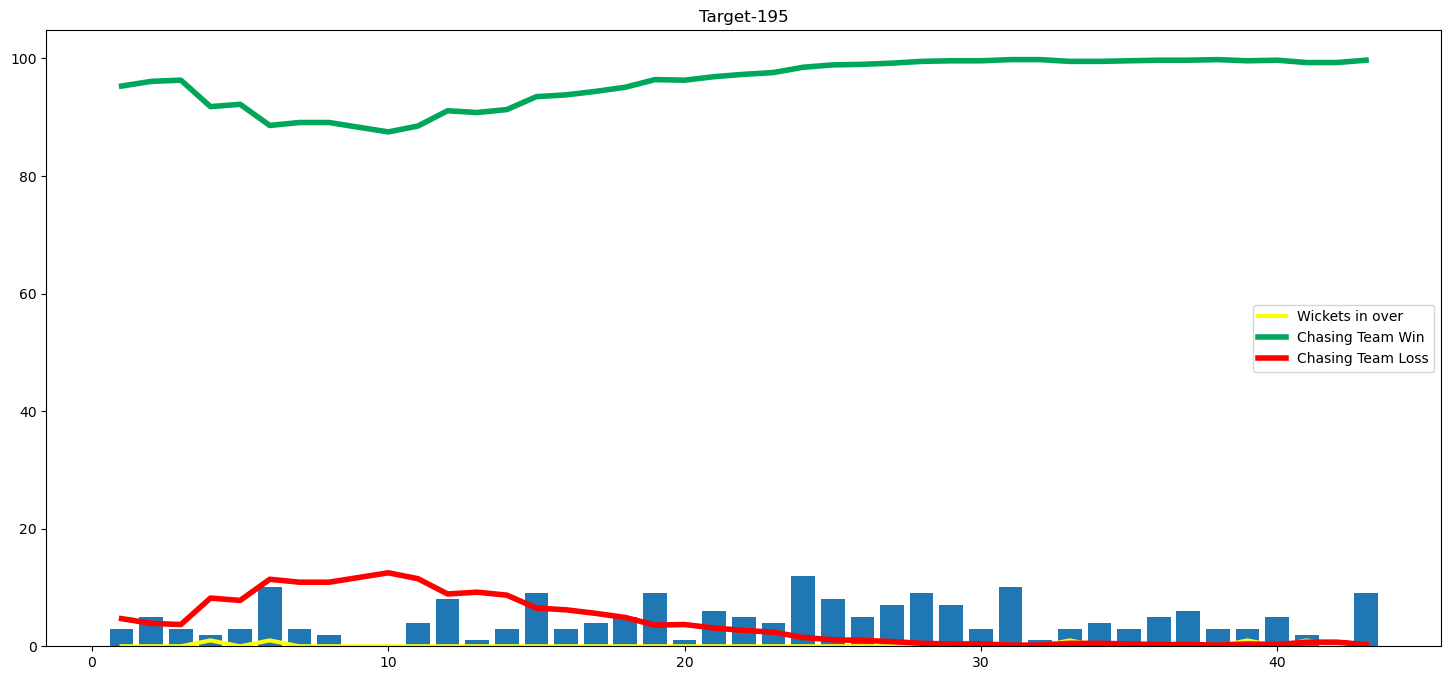

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)

plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.legend(['Wickets in over','Chasing Team Win','Chasing Team Loss'])
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [ ]:
import pickle 
pickle.dump(pipe,open('pipe2.pkl','wb'))

In [ ]:
trf